In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

yk_array = []

def Shooting_method(a):
    global yk_array
    #Начальные условия
    y0 = a
    dy0 = 1 # Для первой производной подбираем параметр - метод стрельб
    x0 = 0
    x1 = 1

    N = 10000 
    h = (x1 - x0)/N #Шаг

    xk = x0
    yk = a
    dyk = dy0
    yk_array = [yk]
    
    def Euler_method(xn1, yn1, dyn1):
        yn2 = yn1 + h*dyn1 # Метод Эйлера
        dyn2 = dyn1 + h*(xn1+math.sin(math.sqrt(xn1)/100)) # Также метод Эйлера, только из данного уравнение выразиил y" и подставили сюда
        return (yn2, dyn2)

    while xk<x1:
        yk, dyk = Euler_method(xk, yk, dyk)
        yk_array.append(yk)
        xk += h
    return yk


Shooting_method(0.1)

1.2694333105319244

In [2]:
#Метод Ньютона локализации корней для локализации параметра а
h = 1e-3
F = lambda a: Shooting_method(a) # y(a) - y(1)
dF = lambda a: (F(a+h)-F(a))/h
an = 0.1
for i in range(1000):
    if(dF(an)!=0):
     an = an - (F(an)/dF(an))

an

-1.1694333105319212

In [3]:
Shooting_method(an)

4.041363597939718e-17

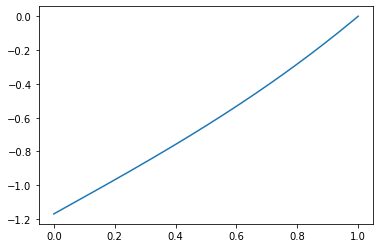

In [4]:
plt.plot(np.linspace(0, 1, len(yk_array)), yk_array)